In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Correct path
df = pd.read_csv('/content/drive/MyDrive/VIC01/ship_features_46features.csv')
df['class'] = df['Filename'].str.extract(r'class_(\d+)').astype(int)
df.head()

,duration,rms,zcr,centroid,bandwidth,rolloff,flatness,entropy,mfcc_0,mfcc_1,...,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,Filename,class
0,4.986,0.053496,0.007755,2181.896684,3408.663997,5874.749599,0.000630,3.161785,-418.510529,46.396538,...,-0.002528,0.000137,0.000011,-0.001189,-0.000404,0.000374,-0.000691,-0.001369,20210114T024644.264Z_class_2_seg_0.wav,2
1,5.000,0.499382,0.000512,288.272287,1122.557223,281.200080,0.000019,2.635863,-371.210449,92.170792,...,-0.002059,0.000138,0.000217,-0.000587,-0.000041,0.000433,-0.000466,-0.001079,20210105T235449.492Z_class_2_seg_1.wav,2
2,4.694,0.028437,0.000000,489.775565,1880.172416,81.313776,0.000015,1.651114,-605.190796,81.487457,...,-0.006970,-0.000379,0.000094,-0.002055,-0.000482,0.000807,-0.001836,-0.003659,20210109T013707.784Z_class_4a_seg_4.wav,4
3,2.732,0.216513,0.000194,430.407102,1551.021670,348.135965,0.000033,3.407979,-424.758118,84.996399,...,-0.001535,0.000024,0.000055,-0.000539,-0.000132,0.000235,-0.000394,-0.000814,20210111T233040.184Z_class_2_seg_1.wav,2
4,5.000,0.028595,0.005823,1587.366921,2899.967862,4007.637780,0.000434,2.884672,-462.814301,86.717628,...,-0.005409,0.000732,0.000563,-0.002086,-0.000379,0.001261,-0.001246,-0.002887,20210116T131736.318Z_class_2_seg_0.wav,2


In [ ]:
df.columns

Index(['duration', 'rms', 'zcr', 'centroid', 'bandwidth', 'rolloff',
       'flatness', 'entropy', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4',
       'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'gfcc_0', 'gfcc_1', 'gfcc_2', 'gfcc_3', 'gfcc_4', 'gfcc_5',
       'gfcc_6', 'gfcc_7', 'gfcc_8', 'gfcc_9', 'gfcc_10', 'gfcc_11', 'gfcc_12',
       'Filename', 'class'],
      dtype='object')

In [ ]:
df['duration'].sum()/3600

np.float64(47.59065646701388)

In [ ]:
df.groupby('class')['duration'].sum()/3600


,duration
class,
1,8.532725
2,16.542509
3,2.737155
4,19.778266


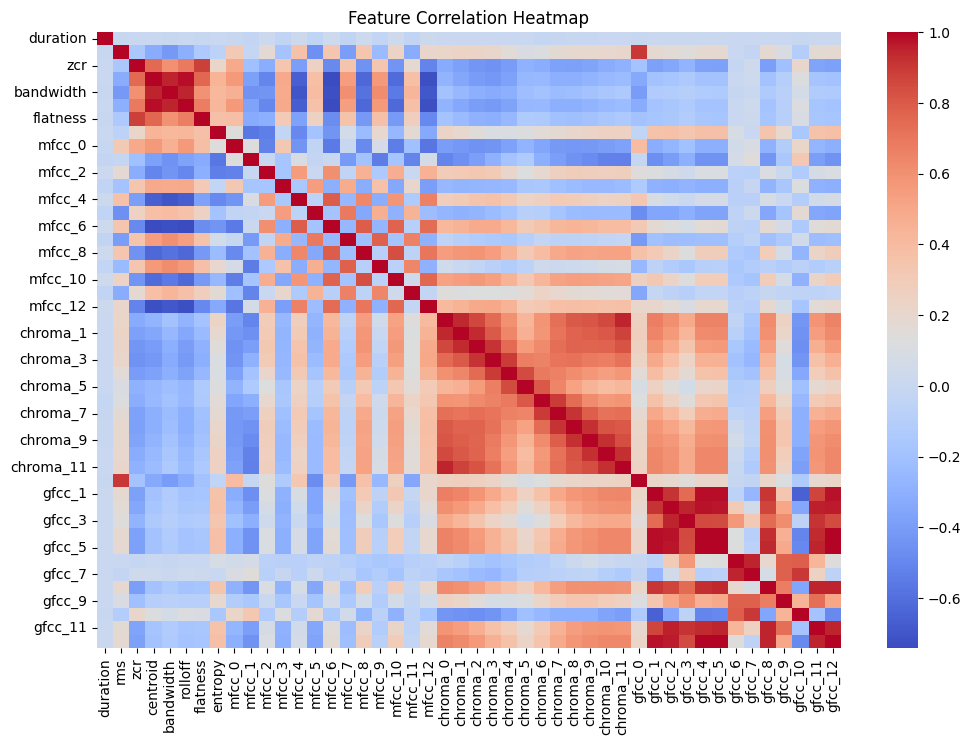

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['Filename', 'class']).corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


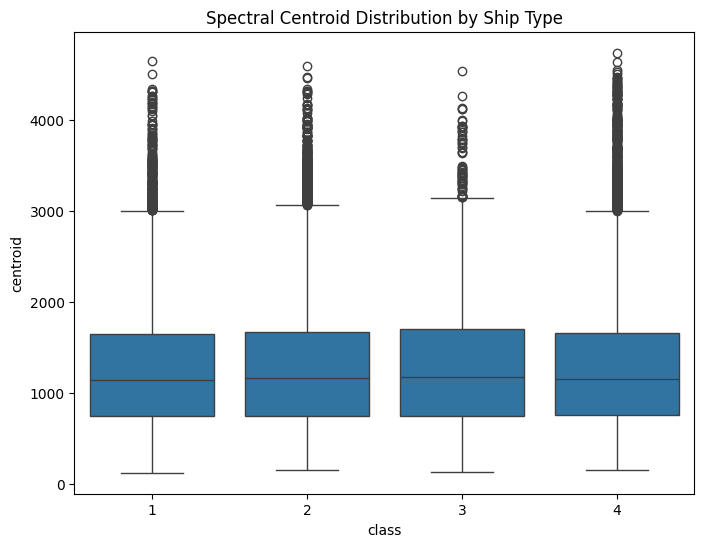

In [ ]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='centroid', data=df)
plt.title("Spectral Centroid Distribution by Ship Type")
plt.show()


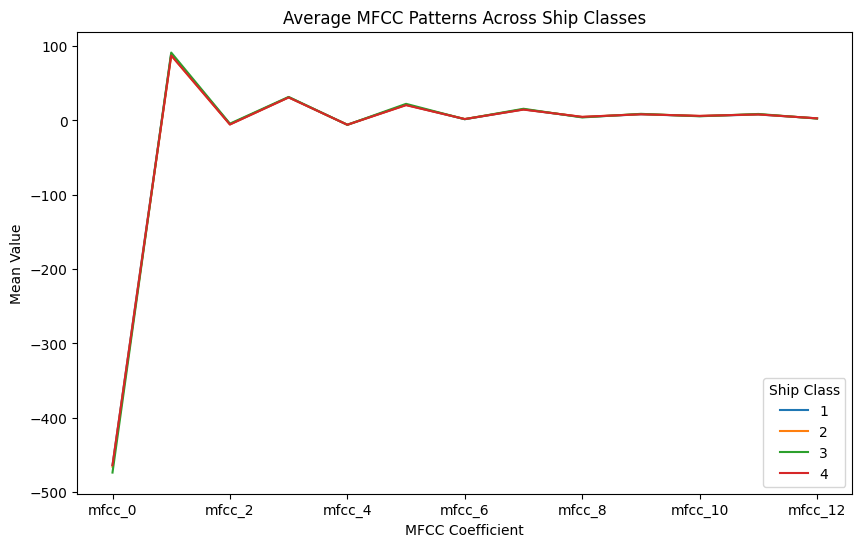

In [ ]:
import numpy as np

mfcc_cols = [f'mfcc_{i}' for i in range(13)]
mfcc_means = df.groupby('class')[mfcc_cols].mean().T
mfcc_means.plot(figsize=(10,6))
plt.title("Average MFCC Patterns Across Ship Classes")
plt.xlabel("MFCC Coefficient")
plt.ylabel("Mean Value")
plt.legend(title='Ship Class')
plt.show()


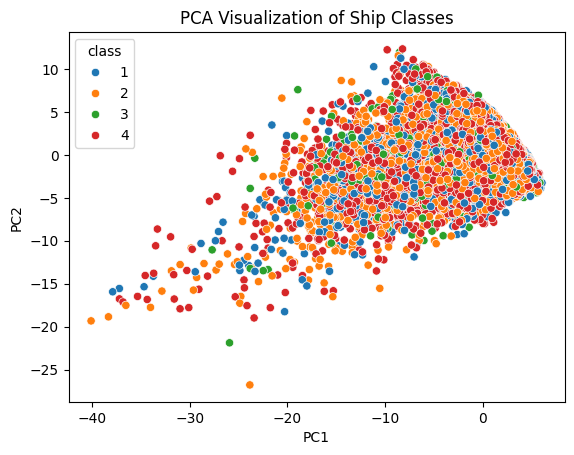

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

X = df.drop(columns=['Filename','class'])
y = df['class']

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['class'] = y.values

sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='class', palette='tab10')
plt.title("PCA Visualization of Ship Classes")
plt.show()


/tmp/ipython-input-3277180720.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='centroid', data=df, palette='Set2')


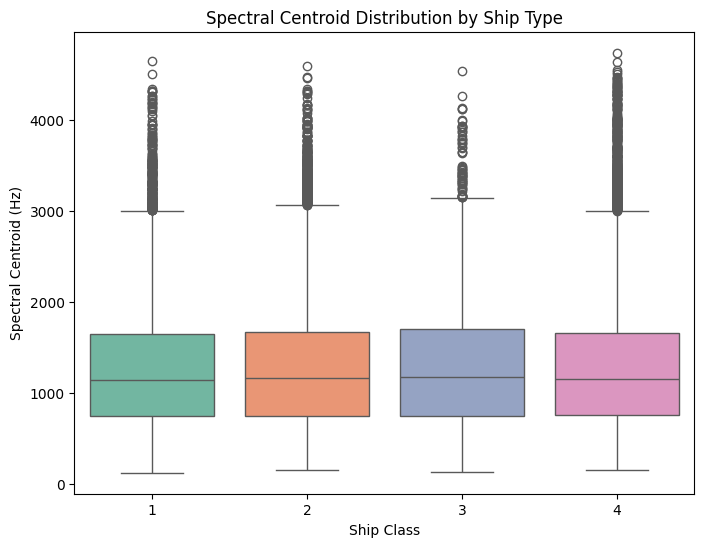

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='centroid', data=df, palette='Set2')
plt.title("Spectral Centroid Distribution by Ship Type")
plt.xlabel("Ship Class")
plt.ylabel("Spectral Centroid (Hz)")
plt.show()


/tmp/ipython-input-1345678740.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='class', y='rms', data=df, palette='pastel')


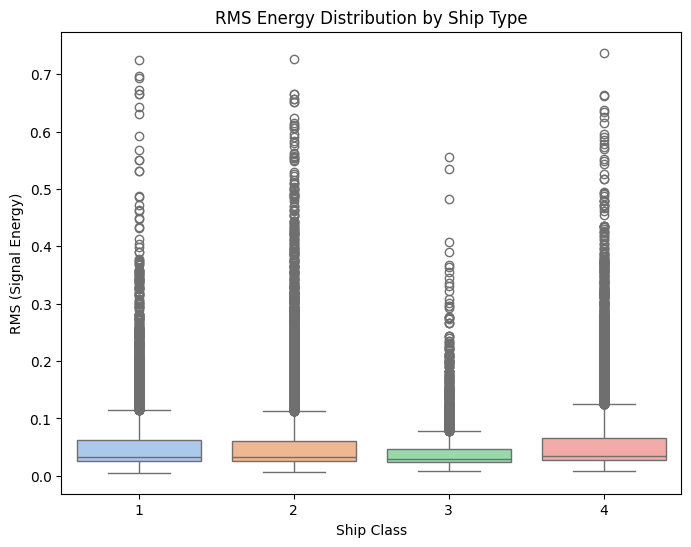

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x='class', y='rms', data=df, palette='pastel')
plt.title("RMS Energy Distribution by Ship Type")
plt.xlabel("Ship Class")
plt.ylabel("RMS (Signal Energy)")
plt.show()


<Figure size 1000x600 with 0 Axes>

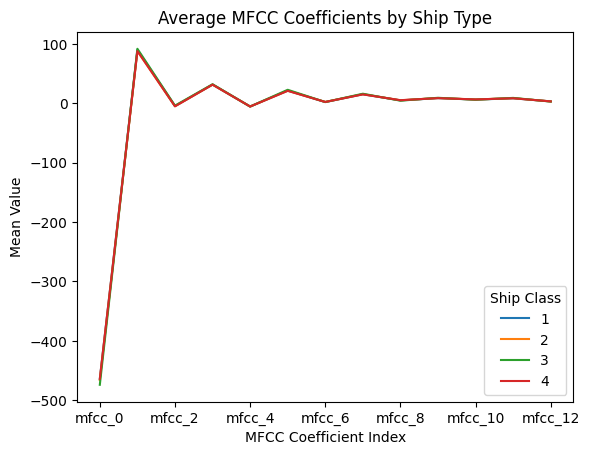

In [ ]:
import numpy as np

mfcc_cols = [f'mfcc_{i}' for i in range(13)]
mfcc_means = df.groupby('class')[mfcc_cols].mean().T

plt.figure(figsize=(10,6))
mfcc_means.plot()
plt.title("Average MFCC Coefficients by Ship Type")
plt.xlabel("MFCC Coefficient Index")
plt.ylabel("Mean Value")
plt.legend(title="Ship Class")
plt.show()
